#### Copyright © [2023] TechMazone. All rights reserved. Unauthorized use prohibited

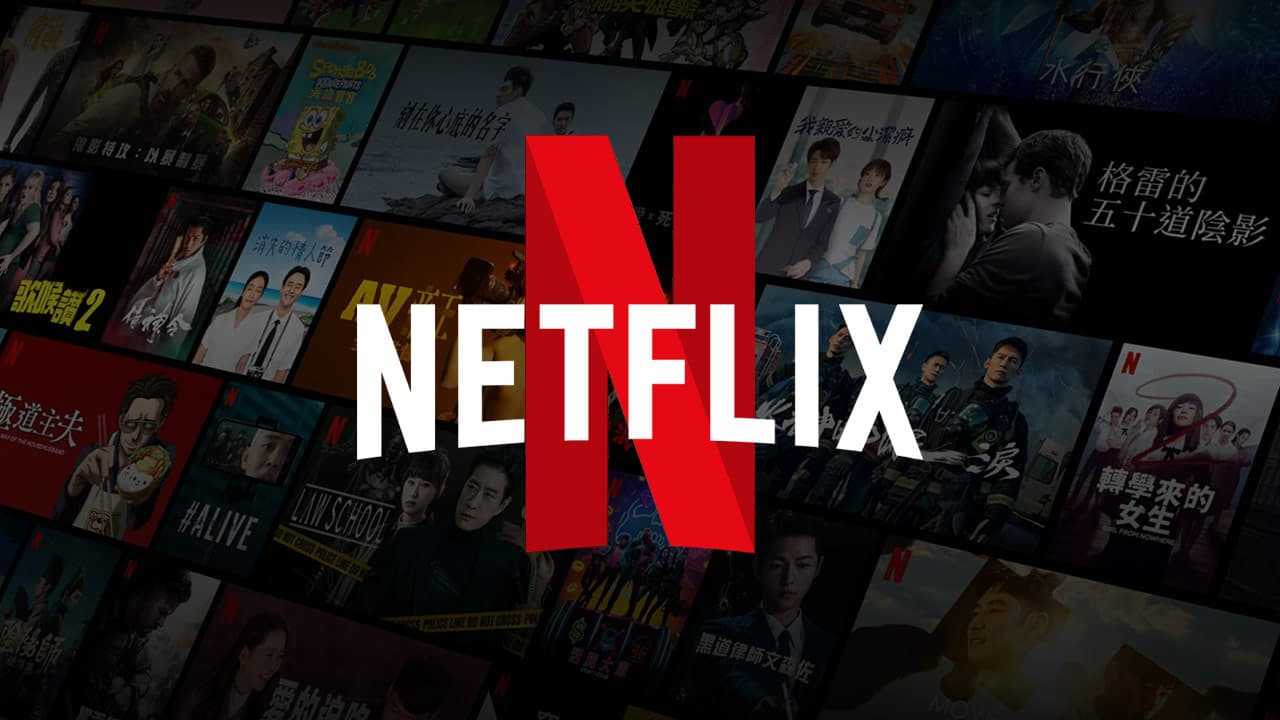

# file used =  "Netflix.csv"

**Task 1: Handle Missing Data**
- Identify columns with missing values in the dataset.
- Replace the missing values with "Unknown".

**Task 2: Handle Messy Data**
- Remove "**" from the "title" column.
- Convert the date format from "9/25/2021" to "9-25-2021".
- Clean the "release_year" column by removing bad characters ( bad_char =  ["(" , ")" , "c" , "C" , "." , " " , "S" , "s"] )
   
       Hint :

        bad_char = ["(" , ")" , "c" , "C" , "." , " " , "S" , "s"]

        for i in bad_char:

            netflix["release_year"] = netflix["release_year"].str.replace(i, "")

- Clean the "rating" column by removing ",?" and replacing mid hyphen with an underscore.

**Task 3: Keeping Only the Relevant Data**
- Split the last column ("listed_in") using commas.
- Keep only the first category from the split list.
- e.g :
[TV Dramas,  TV Horror,  TV Mysteries] --- >  only keep 'TV Dramas'

**Task 4: Generate Insights**
- Determine which type (movies or TV shows) is more prominent on Netflix based on the cleaned data.
- Identify the year that has the least number of releases in the dataset.
- Count the number of distinct ratings in the Netflix dataset.
- Create a frequency table of categories (e.g., Documentaries, Dramas) to show the count of each category.


In [1]:
import pandas as pd

In [2]:
#importing file
netflix= pd.read_csv("Netflix.csv")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3934 non-null   object
 1   title         4001 non-null   object
 2   date_added    4001 non-null   object
 3   release_year  4001 non-null   object
 4   rating        4001 non-null   object
 5   listed_in     4001 non-null   object
dtypes: object(6)
memory usage: 187.7+ KB


# Column identified as null is "Type" 

In [3]:
netflix["type"]= netflix["type"].astype(str)

In [4]:
netflix["type"]= netflix["type"].replace(["nan,NaN"], "Unknown")

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          4001 non-null   object
 1   title         4001 non-null   object
 2   date_added    4001 non-null   object
 3   release_year  4001 non-null   object
 4   rating        4001 non-null   object
 5   listed_in     4001 non-null   object
dtypes: object(6)
memory usage: 187.7+ KB


In [6]:
netflix

,type,title,date_added,release_year,rating,listed_in
0,Movie,**Dick Johnson Is Dead**,9/25/2021,2020),",?PG-13",Documentaries
1,TV Show,**Ganglands**,9/24/2021,2021C,",?TV-MA","Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,**Midnight Mass**,9/24/2021,2021c,",?TV-MA","TV Dramas, TV Horror, TV Mysteries"
3,Movie,**Confessions of an Invisible Girl**,9/22/2021,2021,",?TV-PG","Children & Family Movies, Comedies"
4,Movie,**Sankofa**,9/24/2021,1993S,",?TV-MA","Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...
3996,Movie,**One 2 Ka 4**,3/15/2017,2001S,",?TV-14","Action & Adventure, Comedies, Dramas"
3997,Movie,**Jim Norton: Mouthful of Shame**,3/14/2017,2017,",?TV-MA",Stand-Up Comedy
3998,Movie,**100 Meters**,03/10/2017,2016s,",?TV-MA","Dramas, International Movies, Sports Movies"
3999,Movie,**Burning Sands**,03/10/2017,2017s,",?TV-MA","Dramas, Independent Movies"


# removing * from title column

In [7]:
netflix.iloc[:,1]

0                   **Dick Johnson Is Dead**
1                              **Ganglands**
2                          **Midnight Mass**
3       **Confessions of an Invisible Girl**
4                                **Sankofa**
                        ...                 
3996                          **One 2 Ka 4**
3997       **Jim Norton: Mouthful of Shame**
3998                          **100 Meters**
3999                       **Burning Sands**
4000               **The Butterfly's Dream**
Name: title, Length: 4001, dtype: object

In [8]:
netflix.iloc[:,1]=netflix.iloc[:,1].str.strip("*")

In [9]:
netflix.iloc[:,1]

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions of an Invisible Girl
4                                Sankofa
                      ...               
3996                          One 2 Ka 4
3997       Jim Norton: Mouthful of Shame
3998                          100 Meters
3999                       Burning Sands
4000               The Butterfly's Dream
Name: title, Length: 4001, dtype: object

In [10]:
netflix.iloc[:,2]

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
3996     3/15/2017
3997     3/14/2017
3998    03/10/2017
3999    03/10/2017
4000    03/10/2017
Name: date_added, Length: 4001, dtype: object

In [11]:
netflix.iloc[:,2]=netflix.iloc[:,2].str.replace("/","-")

In [12]:
netflix.iloc[:,2]

0        9-25-2021
1        9-24-2021
2        9-24-2021
3        9-22-2021
4        9-24-2021
           ...    
3996     3-15-2017
3997     3-14-2017
3998    03-10-2017
3999    03-10-2017
4000    03-10-2017
Name: date_added, Length: 4001, dtype: object

In [13]:
netflix["release_year"]

0       2020)
1       2021C
2       2021c
3        2021
4       1993S
        ...  
3996    2001S
3997     2017
3998    2016s
3999    2017s
4000     2013
Name: release_year, Length: 4001, dtype: object

In [14]:
bad_char = ["(" , ")" , "c" , "C" , "." , " " , "S" , "s"]

for i in bad_char:
    
      netflix["release_year"] = netflix["release_year"].str.replace(i, "")

C:\Users\asad\AppData\Local\Temp\ipykernel_1524\3409585595.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix["release_year"] = netflix["release_year"].str.replace(i, "")


In [15]:
netflix["release_year"]

0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
3996    2001
3997    2017
3998    2016
3999    2017
4000    2013
Name: release_year, Length: 4001, dtype: object

In [16]:
netflix['rating']

0       ,?PG-13
1       ,?TV-MA
2       ,?TV-MA
3       ,?TV-PG
4       ,?TV-MA
         ...   
3996    ,?TV-14
3997    ,?TV-MA
3998    ,?TV-MA
3999    ,?TV-MA
4000    ,?TV-PG
Name: rating, Length: 4001, dtype: object

In [17]:
netflix['rating'] = netflix['rating'].str.strip(",?")

In [18]:
netflix['rating'].str.replace("-","_")

0       PG_13
1       TV_MA
2       TV_MA
3       TV_PG
4       TV_MA
        ...  
3996    TV_14
3997    TV_MA
3998    TV_MA
3999    TV_MA
4000    TV_PG
Name: rating, Length: 4001, dtype: object

In [19]:
netflix['listed_in']

0                                           Documentaries
1       Crime TV Shows, International TV Shows, TV Act...
2                      TV Dramas, TV Horror, TV Mysteries
3                      Children & Family Movies, Comedies
4        Dramas, Independent Movies, International Movies
                              ...                        
3996                 Action & Adventure, Comedies, Dramas
3997                                      Stand-Up Comedy
3998          Dramas, International Movies, Sports Movies
3999                           Dramas, Independent Movies
4000        Dramas, International Movies, Romantic Movies
Name: listed_in, Length: 4001, dtype: object

In [20]:
 netflix.iloc[:,5]=netflix.iloc[:,5].str.split(",",expand=True)[0]

In [21]:

 netflix.iloc[:,5]
    

0                  Documentaries
1                 Crime TV Shows
2                      TV Dramas
3       Children & Family Movies
4                         Dramas
                  ...           
3996          Action & Adventure
3997             Stand-Up Comedy
3998                      Dramas
3999                      Dramas
4000                      Dramas
Name: listed_in, Length: 4001, dtype: object

In [22]:
netflix['type'].value_counts()

Movie      3453
TV Show     481
nan          67
Name: type, dtype: int64

In [25]:
netflix['release_year'].value_counts()

2019    613
2018    600
2020    581
2017    446
2021    385
       ... 
1972      1
1959      1
1925      1
1961      1
1969      1
Name: release_year, Length: 63, dtype: int64

In [26]:
netflix['release_year'].value_counts().min()

1

In [27]:
netflix["release_year"].value_counts()==1
one_bool=netflix["release_year"].value_counts()==1

In [30]:
years=netflix["release_year"].value_counts()[one_bool]
years

1970    1
1974    1
1962    1
1960    1
1966    1
1964    1
1963    1
1956    1
1958    1
1972    1
1959    1
1925    1
1961    1
1969    1
Name: release_year, dtype: int64

In [31]:
print("Years with least no. of releases are:")
years.keys()

Years with least no. of releases are:


Index(['1970', '1974', '1962', '1960', '1966', '1964', '1963', '1956', '1958',
       '1972', '1959', '1925', '1961', '1969'],
      dtype='object')

In [32]:
 netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17'], dtype=object)

In [33]:
len( netflix['rating'].unique())

11

In [34]:
netflix['listed_in'].value_counts()

Dramas                          939
Comedies                        763
Action & Adventure              474
Documentaries                   370
Children & Family Movies        353
Stand-Up Comedy                 249
International TV Shows          184
Horror Movies                   139
International Movies             90
Crime TV Shows                   82
Kids' TV                         60
Docuseries                       55
Thrillers                        34
Movies                           26
Anime Series                     26
British TV Shows                 24
Classic Movies                   22
Reality TV                       21
Anime Features                   18
Music & Musicals                 13
TV Shows                         11
Independent Movies               10
Stand-Up Comedy & Talk Shows     10
Sci-Fi & Fantasy                  6
TV Dramas                         5
Cult Movies                       4
TV Comedies                       4
Romantic TV Shows           